# Data management project

Greetings.

In this file, I will try to make a simple analysis of real pump data I made some time ago.
I'm going to make graphs, and a conclusion in the end.

First of all, I'm going to read data from flow meter calibration.

In [40]:
import pandas as pd  # importing all the necessary packs for the analysis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin

In [41]:
calibration = pd.read_excel('flow_meter_calibration.xlsx')

In [42]:
calibration.head(5)

,h Mpa,Q m3/h,U V,h m
0,0.075,32.1,0.410,7.5
1,0.105,29.3,0.373,10.5
2,0.120,27.2,0.347,12.0
3,0.138,24.6,0.318,13.8
4,0.160,21.0,0.271,16.0


In [43]:
calibration.shape

(50, 4)

Table contains data which were gatered during calibration. h represents pressure, Q - flow rate, U - voltage and another h - head in meters. 

It's important to make a graph Q(U) and figure out which trendline fits it.

Right now the table is not readible, it is important to change name of the columns.

In [44]:
calibration = calibration.rename(columns={'h Mpa': 'pressure', 'Q m3/h': 'flow_rate', 'U V': 'voltage', 'h m': 'head'})

In [45]:
calibration.head(5)

,pressure,flow_rate,voltage,head
0,0.075,32.1,0.410,7.5
1,0.105,29.3,0.373,10.5
2,0.120,27.2,0.347,12.0
3,0.138,24.6,0.318,13.8
4,0.160,21.0,0.271,16.0


It's sure that no data were lost

In [46]:
calibration.shape

(50, 4)

It's important also to see data description.

In [47]:
calibration.describe()

,pressure,flow_rate,voltage,head
count,50.000000,50.000000,50.000000,50.000000
mean,0.166780,17.452000,0.223240,16.678000
std,0.040484,9.527232,0.123425,4.048395
min,0.075000,0.000000,0.000000,7.500000
25%,0.136500,9.275000,0.120250,13.650000
50%,0.179000,17.850000,0.231500,17.900000
75%,0.196000,26.000000,0.334500,19.600000
max,0.230000,32.600000,0.415000,23.000000


Taking into account the fact that we need to use only two columns. It's possible to drop the other two.

In [48]:
calibration_dep = calibration.drop(['pressure', 'head'], axis=1)

In [49]:
calibration_dep.head(5)

,flow_rate,voltage
0,32.1,0.410
1,29.3,0.373
2,27.2,0.347
3,24.6,0.318
4,21.0,0.271


In [50]:
calibration_dep.shape

(50, 2)

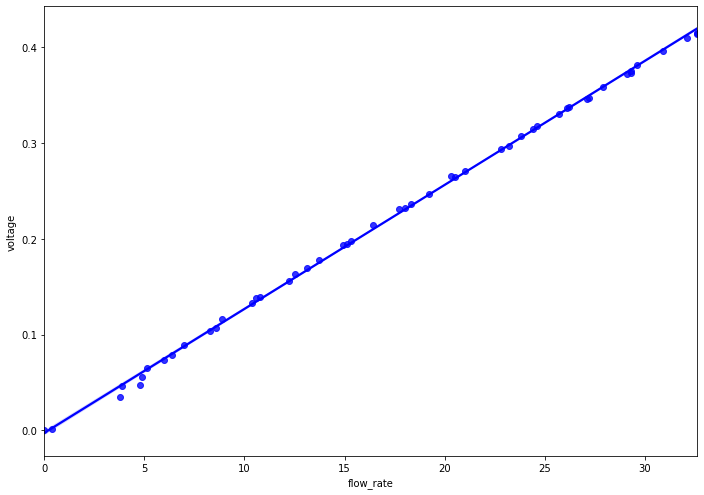

In [51]:
a4_dims = (11.7, 8.27)  # addint the dimentions that will be used for the plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(data=calibration_dep, x='flow_rate', y='voltage', ax=ax, color='blue')

It is possible to visually estimate that the dependency between those values is linear. 

Matplotlib and seaborn packages doesn't allow you to gather trendline equation. But it's very important to have, and this is the next step.

In [52]:
flow_rate = calibration_dep['flow_rate']  # creating variables for each column
voltage = calibration_dep['voltage']

Optimization terminated successfully.
         Current function value: 0.120344
         Iterations: 64
         Function evaluations: 122


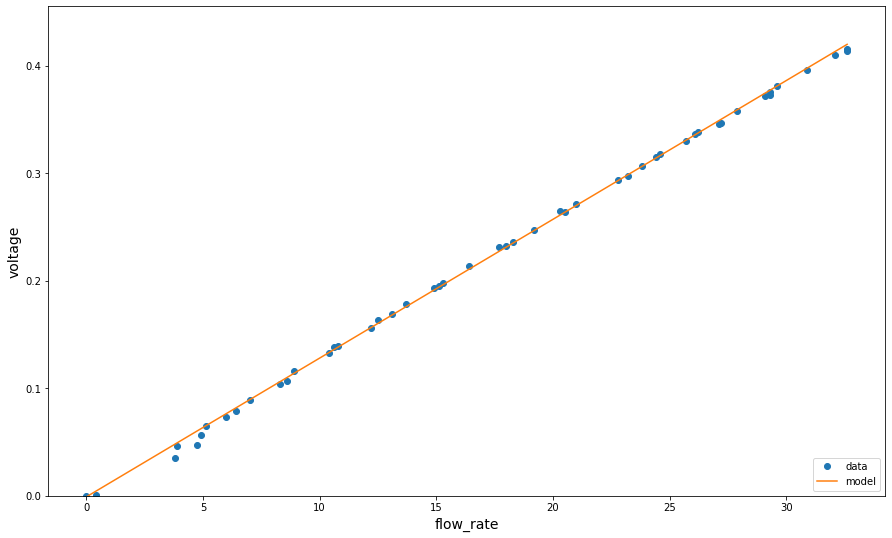

The best solution is:  [  77.45035343 -853.27399559] ,
and corresponding value of the objective function is:  0.1203442510429103


In [53]:
x = np.linspace(start = flow_rate.min(), stop = flow_rate.max(), num = 100)

def linear_model(x, pars):
    a, b = pars   # unpack model parameters
    return a*x + b    # linear function equation

def Q(pars, model, dataset):
    a, b = pars        # unpack parameters
    xdata, ydata = calibration_dep['flow_rate'], calibration_dep['voltage']  # unpack dataset
    ypred = model(xdata, pars)  # calculate model predictions for all data
    return sum(abs(ydata - ypred))


pars_init = np.random.uniform(-1,1, size=2)  # nearest neighbor search
pars_best = fmin(Q, pars_init, args=(linear_model, calibration_dep))
plt.figure(figsize=(15, 9))

plt.plot(flow_rate, voltage, 'o', label='data')
plt.ylim([0, voltage.max() + 0.04])
plt.plot(x, linear_model(x, pars_best), label='model')

plt.xlabel('flow_rate', fontsize=14)
plt.ylabel('voltage', fontsize=14)
plt.legend(loc='lower right')
# see the file in the current directory!
plt.savefig('my_fig.png', dpi=500)   
plt.show()

print('The best solution is: ', (1/pars_best), ',\nand corresponding value of the objective function is: ', Q(pars_best, linear_model, calibration_dep))

The coefficient we need for the following calculations is 77.4.

In [54]:
q_v_coef = 77.44176794

# Experiment data management

Let's open experiment.xlsx and get to know the data.

In [55]:
experiment_data = pd.read_excel('experiment.xlsx')

In [56]:
experiment_data.head(5)

,N_o Exp,V mV,P_in MPa,P_out MPa,N kW
0,1,0.00,0.025,0.248,0.509
1,2,16.40,0.025,0.243,0.525
2,3,32.78,0.024,0.245,0.551
3,4,49.60,0.024,0.244,0.583
4,5,65.54,0.024,0.243,0.619


In [57]:
experiment_data.shape

(44, 5)

In order not to forget the dimension of each value it will be added to the new name that is more readable.

In [58]:
experiment_data = experiment_data.rename(columns={'N_o Exp': 'exp_number', 
                                                  'V mV': 'voltage_mv',
                                                  'P_in MPa': 'pressure_in_mpa',
                                                  'P_out MPa': 'pressure_out_mpa',
                                                  'N kW': 'power_kw'}).set_index('exp_number')

In [59]:
experiment_data.head()

,voltage_mv,pressure_in_mpa,pressure_out_mpa,power_kw
exp_number,,,,
1,0.00,0.025,0.248,0.509
2,16.40,0.025,0.243,0.525
3,32.78,0.024,0.245,0.551
4,49.60,0.024,0.244,0.583
5,65.54,0.024,0.243,0.619


Recalculation voltage into [V], flow rate Q and pressure into [Pa] is needed. For the flow rate calculation, coefficient from calbiration line will be used.

In [60]:
experiment_data['voltage_v'] = experiment_data.voltage_mv / 1000
experiment_data['flow_rate_m3h'] = experiment_data.voltage_v * q_v_coef  # flow rate in [m**3/hr]
experiment_data['flow_rate_m3s'] = experiment_data.flow_rate_m3h / 3600  # flow rate in [m**3/s]
experiment_data['pressure_in_pa'] = experiment_data.pressure_in_mpa * 1000000
experiment_data['pressure_out_pa'] = experiment_data.pressure_out_mpa * 1000000

In [61]:
experiment_data.head(5)

,voltage_mv,pressure_in_mpa,pressure_out_mpa,power_kw,voltage_v,flow_rate_m3h,flow_rate_m3s,pressure_in_pa,pressure_out_pa
exp_number,,,,,,,,,
1,0.00,0.025,0.248,0.509,0.00000,0.000000,0.000000,25000.0,248000.0
2,16.40,0.025,0.243,0.525,0.01640,1.270045,0.000353,25000.0,243000.0
3,32.78,0.024,0.245,0.551,0.03278,2.538541,0.000705,24000.0,245000.0
4,49.60,0.024,0.244,0.583,0.04960,3.841112,0.001067,24000.0,244000.0
5,65.54,0.024,0.243,0.619,0.06554,5.075533,0.001410,24000.0,243000.0


Because for the mesurements transformer from 10 to 5 A were used it is important to recalculate power to its real value.

In [62]:
experiment_data['power_w'] = experiment_data.power_kw * 1000 * 2
experiment_data = experiment_data.drop('power_kw', axis=1)

In [63]:
experiment_data.head()

,voltage_mv,pressure_in_mpa,pressure_out_mpa,voltage_v,flow_rate_m3h,flow_rate_m3s,pressure_in_pa,pressure_out_pa,power_w
exp_number,,,,,,,,,
1,0.00,0.025,0.248,0.00000,0.000000,0.000000,25000.0,248000.0,1018.0
2,16.40,0.025,0.243,0.01640,1.270045,0.000353,25000.0,243000.0,1050.0
3,32.78,0.024,0.245,0.03278,2.538541,0.000705,24000.0,245000.0,1102.0
4,49.60,0.024,0.244,0.04960,3.841112,0.001067,24000.0,244000.0,1166.0
5,65.54,0.024,0.243,0.06554,5.075533,0.001410,24000.0,243000.0,1238.0


To calculate the head using the Bernoulli equation, it is necessary to calculate the speeds С1 and C2

In [64]:
d_in = 0.065  # inlet pipe diameter in [m]
d_out = 0.04  # outlite pipe diameter in [m]
density = 1000  # water density [kg/m**3]
grav_accel = 9.81  # gravitational acceliration [m/s**2]
eta_el_mot = 0.851  # motor efficiency

In [65]:
experiment_data['c1_ms'] = experiment_data.flow_rate_m3s / ((np.pi * d_in**2) / 4)  # velocity of the liquid in the inlet pipe [m/s]
experiment_data['c2_ms'] = experiment_data.flow_rate_m3s / ((np.pi * d_out**2) / 4)

In [66]:
experiment_data.head()

,voltage_mv,pressure_in_mpa,pressure_out_mpa,voltage_v,flow_rate_m3h,flow_rate_m3s,pressure_in_pa,pressure_out_pa,power_w,c1_ms,c2_ms
exp_number,,,,,,,,,,,
1,0.00,0.025,0.248,0.00000,0.000000,0.000000,25000.0,248000.0,1018.0,0.000000,0.000000
2,16.40,0.025,0.243,0.01640,1.270045,0.000353,25000.0,243000.0,1050.0,0.106316,0.280742
3,32.78,0.024,0.245,0.03278,2.538541,0.000705,24000.0,245000.0,1102.0,0.212503,0.561141
4,49.60,0.024,0.244,0.04960,3.841112,0.001067,24000.0,244000.0,1166.0,0.321542,0.849072
5,65.54,0.024,0.243,0.06554,5.075533,0.001410,24000.0,243000.0,1238.0,0.424876,1.121939


Now it's possible to appy Bernoulli's equation and calculate value of head for each experiment

In [67]:
experiment_data['head_m'] = ((experiment_data.pressure_out_pa - experiment_data.pressure_in_pa) / (density * grav_accel)) + \
                            ((experiment_data.c2_ms**2 - experiment_data.c1_ms**2) / (2 * grav_accel))
                            

In [68]:
experiment_data.head()

,voltage_mv,pressure_in_mpa,pressure_out_mpa,voltage_v,flow_rate_m3h,flow_rate_m3s,pressure_in_pa,pressure_out_pa,power_w,c1_ms,c2_ms,head_m
exp_number,,,,,,,,,,,,
1,0.00,0.025,0.248,0.00000,0.000000,0.000000,25000.0,248000.0,1018.0,0.000000,0.000000,22.731906
2,16.40,0.025,0.243,0.01640,1.270045,0.000353,25000.0,243000.0,1050.0,0.106316,0.280742,22.225663
3,32.78,0.024,0.245,0.03278,2.538541,0.000705,24000.0,245000.0,1102.0,0.212503,0.561141,22.541780
4,49.60,0.024,0.244,0.04960,3.841112,0.001067,24000.0,244000.0,1166.0,0.321542,0.849072,22.457571
5,65.54,0.024,0.243,0.06554,5.075533,0.001410,24000.0,243000.0,1238.0,0.424876,1.121939,22.379115


In [69]:
experiment_data.shape  # no data were lost

(44, 12)

The last parameter that is needed is pump's efficiency

In [70]:
experiment_data['efficiency'] = ((density * grav_accel * experiment_data.head_m * experiment_data.flow_rate_m3s) \
                                / (experiment_data.power_w * eta_el_mot))*100

In order to keep data clean,  several columns needed to drop.

In [71]:
experiment_data = experiment_data.drop(['voltage_mv', 'pressure_in_mpa', 'pressure_out_mpa', 'voltage_v', 'flow_rate_m3s',
                                       'c1_ms', 'c2_ms'], axis=1)

In [72]:
experiment_data.head()

,flow_rate_m3h,pressure_in_pa,pressure_out_pa,power_w,head_m,efficiency
exp_number,,,,,,
1,0.000000,25000.0,248000.0,1018.0,22.731906,0.000000
2,1.270045,25000.0,243000.0,1050.0,22.225663,8.608381
3,2.538541,24000.0,245000.0,1102.0,22.541780,16.627531
4,3.841112,24000.0,244000.0,1166.0,22.457571,23.689621
5,5.075533,24000.0,243000.0,1238.0,22.379115,29.379263


In [73]:
experiment_data.shape

(44, 6)

Now it is possible to make a pump's performance graph.

In [74]:
flow_rate = np.array(experiment_data['flow_rate_m3h'])
efficiency = np.array(experiment_data['efficiency'])
head = np.array(experiment_data['head_m'])

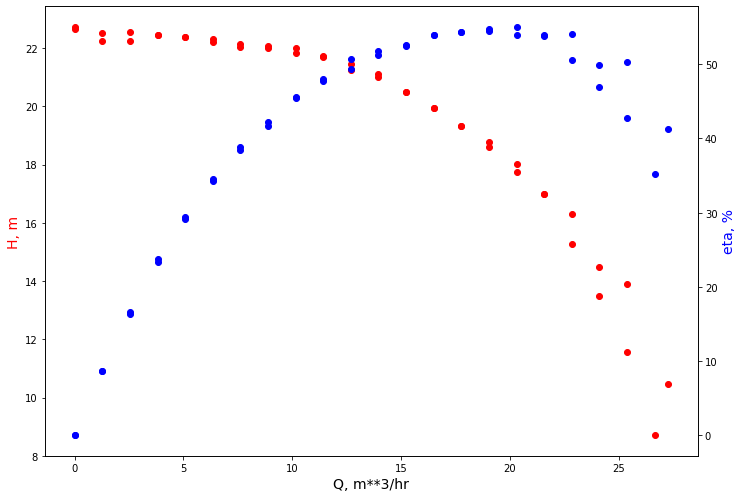

In [75]:
a4_dims = (11.7, 8.27)  # addint the dimentions that will be used for the plot
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=a4_dims)
# make a plot
ax.plot(flow_rate, head, color="red", marker="o", linestyle='')
# set x-axis label
ax.set_xlabel("Q, m**3/hr",fontsize=14)
# set y-axis label
ax.set_ylabel("H, m",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(flow_rate, efficiency,color="blue",marker="o", linestyle='')
ax2.set_ylabel("eta, %",color="blue",fontsize=14)

plt.show()
# save the plot as a file
fig.savefig('pump_performance.png',
            format='png',
            dpi=300,
            bbox_inches='tight')


Data about efficiency and head:

In [76]:
head_max = experiment_data.head_m.max()
efficiency_max = experiment_data.efficiency.max()
head_mean = experiment_data.head_m.mean()
head_disp = experiment_data.head_m.var()

print('Maximum of head is {a} m,'.format(a=round(head_max,1)) \
      + ' maximum of efficiency is {b}%.\nMean value of head is {c} m, and dispersion is {d}'.format(b=round(efficiency_max,2),
                                                                                                 c=round(head_mean,2),
                                                                                                 d=round(head_disp,2)))

Maximum of head is 22.7 m, maximum of efficiency is 55.04%.
Mean value of head is 19.55 m, and dispersion is 13.15


Saving file as xlsx:

In [78]:
experiment_data.to_excel('pump_performance.xlsx', sheet_name='pump_performance')